imorting required libraries

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import *

reading csv file


In [37]:
data=pd.read_csv("/content/drive/MyDrive/Company_data.csv")
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [38]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


since the correlation for tv and the sales s the highest so the replatino for both themm id more so we should select the **TV** as input feature


In [39]:
data.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [40]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [41]:
data=data.drop(['Radio','Newspaper'],axis=1)

data


,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9
...,...,...
195,38.2,7.6
196,94.2,14.0
197,177.0,14.8
198,283.6,25.5


In [11]:
data.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9


splitting the data into train and test data

In [45]:
x_train,X_test,y_train,y_test=model_selection.train_test_split(data[['TV']],data[['Sales']],test_size=0.3,random_state=42,shuffle=True)

In [46]:
x_train.shape,y_train.shape

((140, 1), (140, 1))

In [50]:
model=linear_model.LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [51]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_pred = model.predict(X_test)

print(f'MAE = {mean_absolute_error(y_test, y_pred)}')
print(f'MSE = {mean_squared_error(y_test, y_pred)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'R_2 = {r2_score(y_test, y_pred)}')

MAE = 1.8069123776641516
MSE = 5.179525402166653
RMSE = 2.2758570698017597
R_2 = 0.814855389208679


chekking the fiting of the model to test and trai data

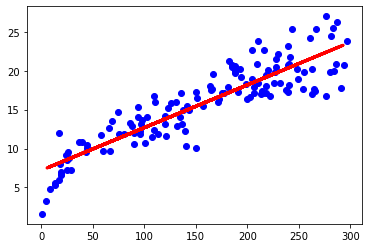

In [56]:

plt.scatter(x_train, y_train, color='blue')
plt.plot(X_test, model.predict(X_test), color='red', linewidth=3)
plt.show()
     

In [81]:
lasso_model=linear_model.Lasso(alpha=1.5);

In [82]:
lasso_model.fit(x_train,y_train)

Lasso(alpha=1.5)

In [83]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_pred = lasso_model.predict(X_test)

print(f'MAE = {mean_absolute_error(y_test, y_pred)}')
print(f'MSE = {mean_squared_error(y_test, y_pred)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'R_2 = {r2_score(y_test, y_pred)}')

MAE = 1.8100109634229464
MSE = 5.1883841984125825
RMSE = 2.2778024932843897
R_2 = 0.8145387273032569


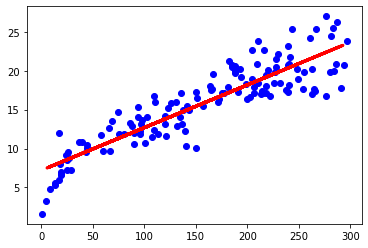

In [67]:
plt.scatter(x_train, y_train, color='blue')
plt.plot(X_test, lasso_model.predict(X_test), color='red', linewidth=3)
plt.show()

In [84]:
ridge_model=linear_model.Ridge(alpha=0.001);

In [85]:
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [86]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_pred = ridge_model.predict(X_test)

print(f'MAE = {mean_absolute_error(y_test, y_pred)}')
print(f'MSE = {mean_squared_error(y_test, y_pred)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'R_2 = {r2_score(y_test, y_pred)}')

MAE = 1.8069123784732497
MSE = 5.17952540437844
RMSE = 2.275857070287684
R_2 = 0.8148553891296176


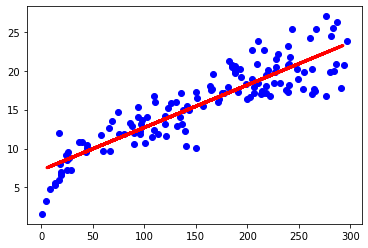

In [87]:
plt.scatter(x_train, y_train, color='blue')
plt.plot(X_test, lasso_model.predict(X_test), color='red', linewidth=3)
plt.show()

In [90]:

import pickle
  
# Save the trained model as a pickle string.
saved_model = pickle.dumps(model)
  
# Load the pickled model
linear_regression_from_pickle = pickle.loads(saved_model)
  
# Use the loaded pickled model to make predictions


In [ ]:

import pickle
  
# Save the trained model as a pickle string.
saved_model = pickle.dumps(lasso_model)
  
# Load the pickled model
lasso_regression_from_pickle = pickle.loads(saved_model)
  
# Use the loaded pickled model to make predictions

In [91]:

import pickle
  
# Save the trained model as a pickle string.
saved_model = pickle.dumps(ridge_model)
  
# Load the pickled model
ridge_regression_from_pickle = pickle.loads(saved_model)
  
# Use the loaded pickled model to make predictions

In [94]:
import torch 
torch.save(model,"/content/drive/MyDrive/Colab Notebooks/linear_model")
torch.save(lasso_model,"/content/drive/MyDrive/Colab Notebooks/lasso_model")
torch.save(ridge_model,"/content/drive/MyDrive/Colab Notebooks/ridge_model")